In [1]:
import ROOT
from larcv import larcv
from larcvdataset import LArCVDataset
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00


In [2]:
iotrain = LArCVDataset("train_dataloader.cfg", "ThreadProcessor", loadallinmem=False)

CONFIGURE
ThreadProcessor : {
  InputFiles : ["/home/phy68/data/practice_train_5k.root"]
  NumBatchStorage : 2
  NumThreads : 2
  ProcessName : ["image","label"]
  ProcessType : ["BatchFillerImage2D","BatchFillerPIDLabel"]
  RandomAccess : true
  Verbosity : 3
  ProcessList : {
    image : {
      Channels : [2]
      EnableMirror : false
      ImageProducer : "data"
      Verbosity : 3
    }

    label : {
      ParticleProducer : "mctruth"
      PdgClassList : [2212,11,211,13,22]
      Verbosity : 3
    }

  }

}

 setting verbosity 3


In [3]:
batchsize=20
iotrain.start(batchsize)

In [4]:
def padandcropandflip(npimg2d):
    imgpad  = np.zeros( (264,264), dtype=np.float32 )
    imgpad[4:256+4,4:256+4] = npimg2d[:,:]
    if np.random.rand()>0.5:
        imgpad = np.flip( imgpad, 0 )
    if np.random.rand()>0.5:
        imgpad = np.flip( imgpad, 1 )
    randx = np.random.randint(0,8)
    randy = np.random.randint(0,8)
    return imgpad[randx:randx+256,randy:randy+256]

In [6]:
labelname = {0:"proton",
            1:"electron",
            2:"pion",
            3:"muon",
            4:"photon"}

(20, 65536)
LABEL[0]:  muon
LABEL[1]:  muon
LABEL[2]:  pion
LABEL[3]:  photon
LABEL[4]:  pion
LABEL[5]:  photon
LABEL[6]:  muon
LABEL[7]:  pion
LABEL[8]:  proton
LABEL[9]:  photon
LABEL[10]:  pion
LABEL[11]:  electron
LABEL[12]:  proton
LABEL[13]:  electron
LABEL[14]:  pion
LABEL[15]:  pion
LABEL[16]:  photon
LABEL[17]:  proton
LABEL[18]:  pion
LABEL[19]:  muon


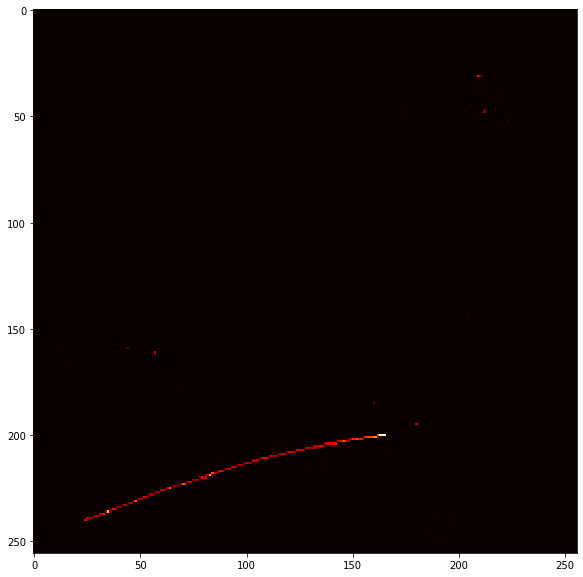

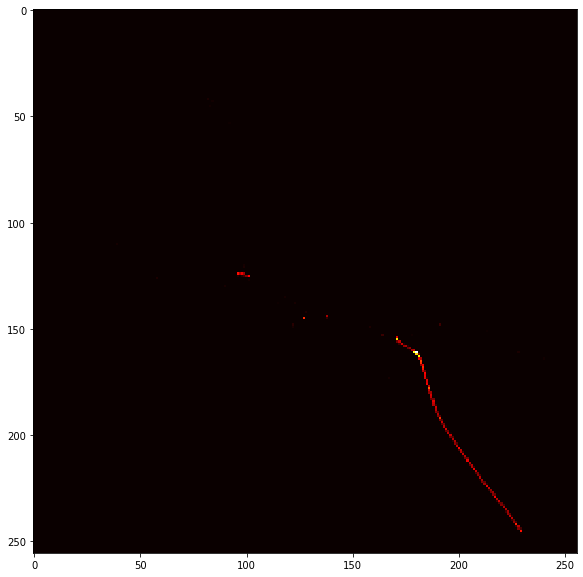

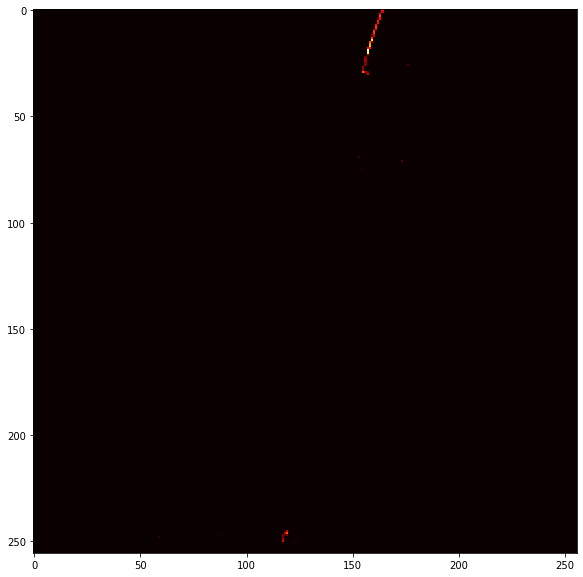

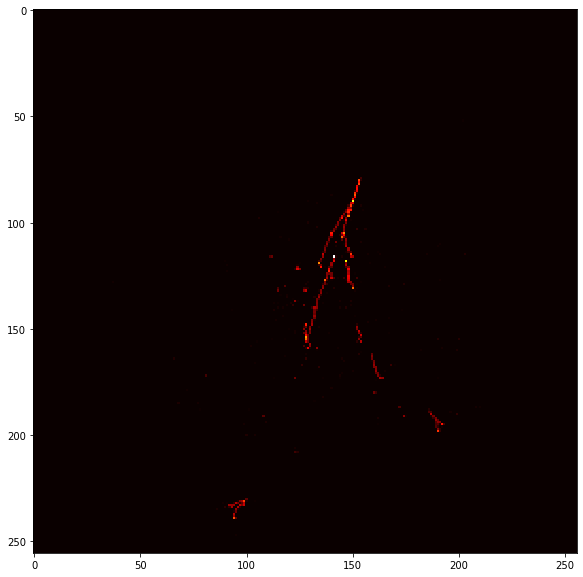

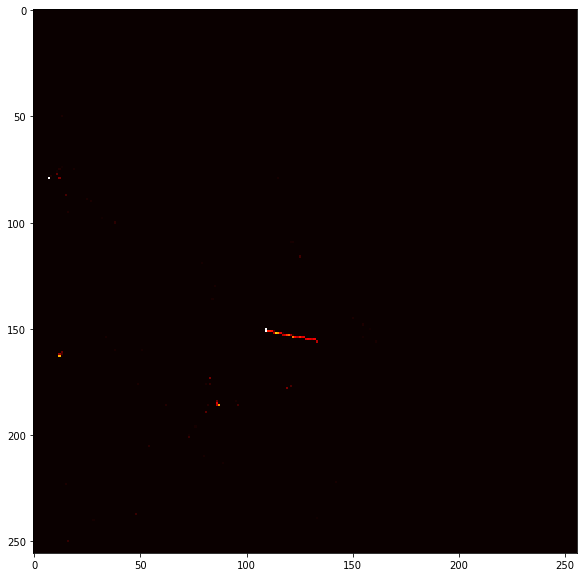

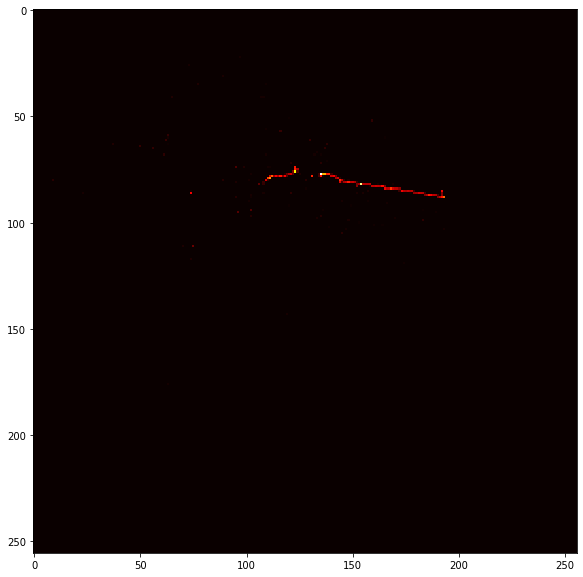

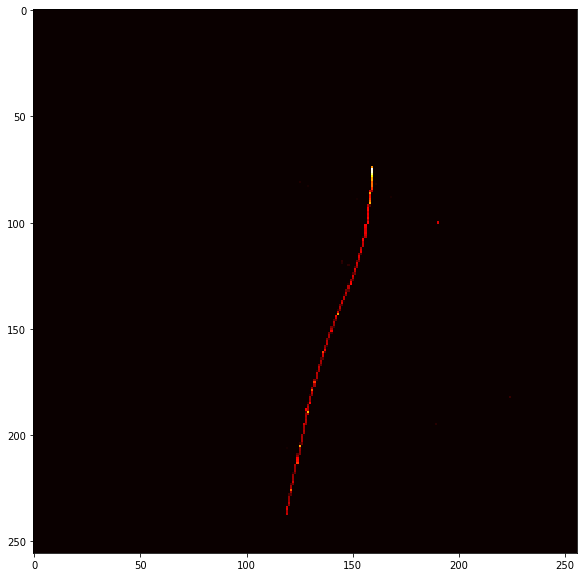

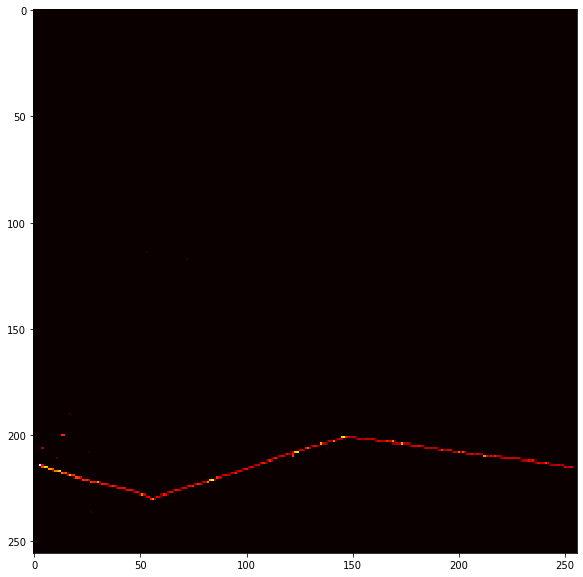

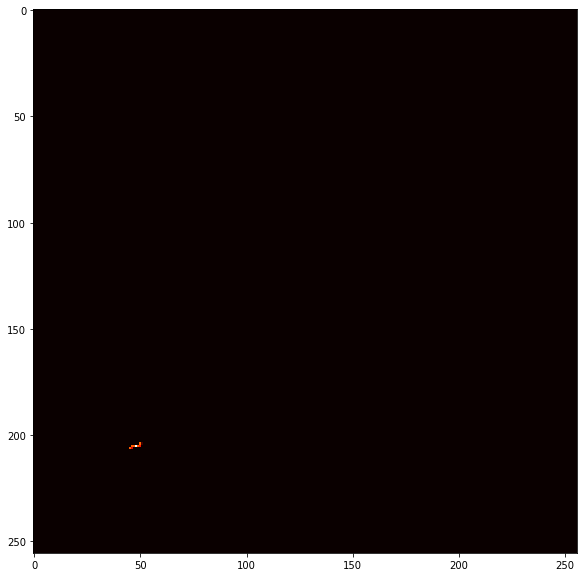

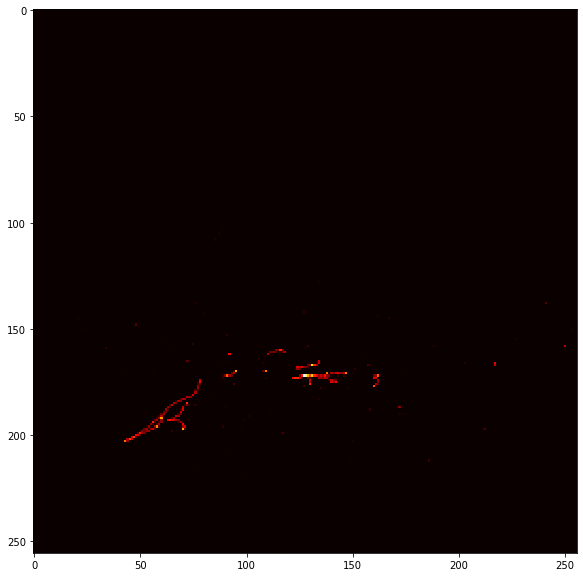

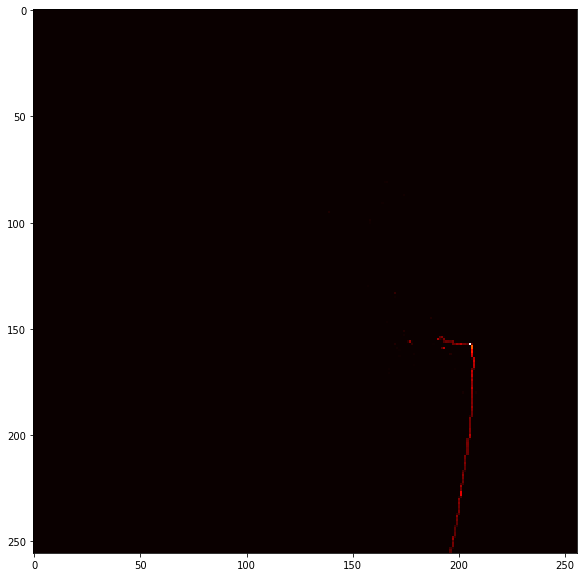

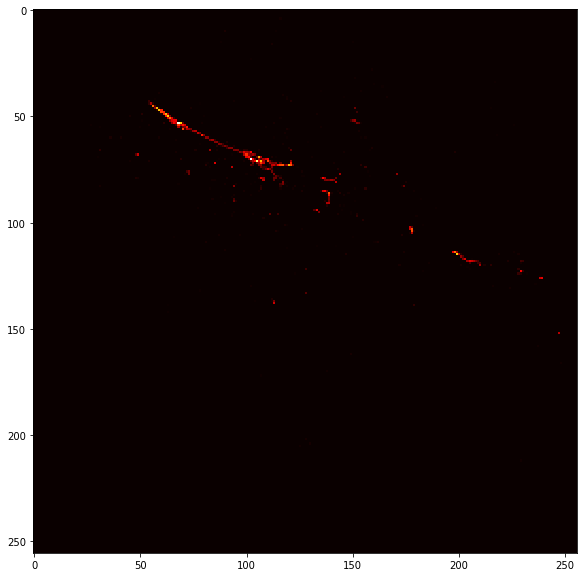

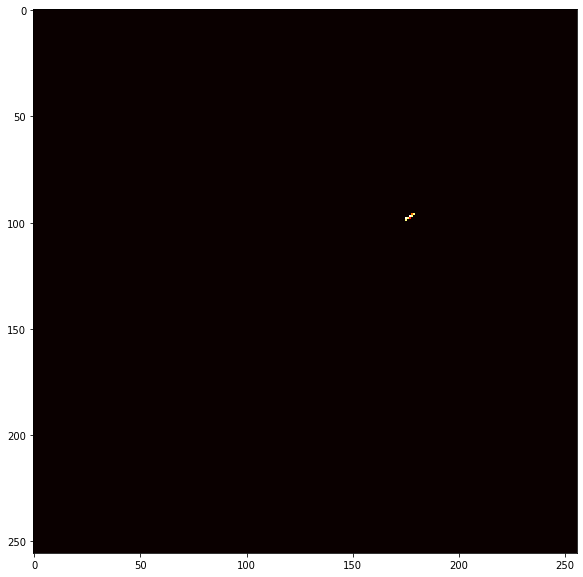

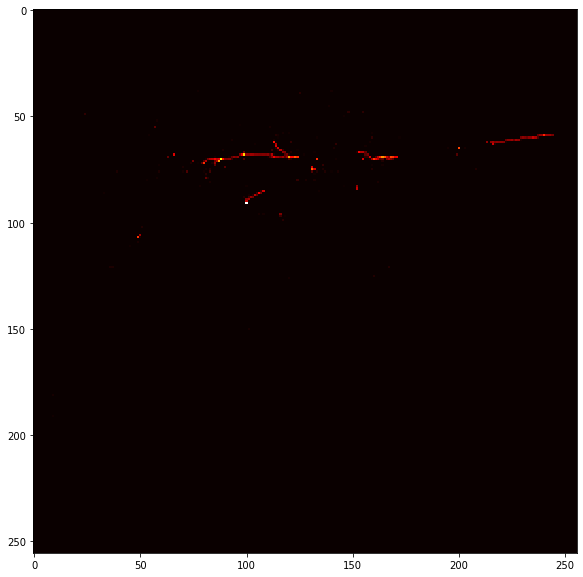

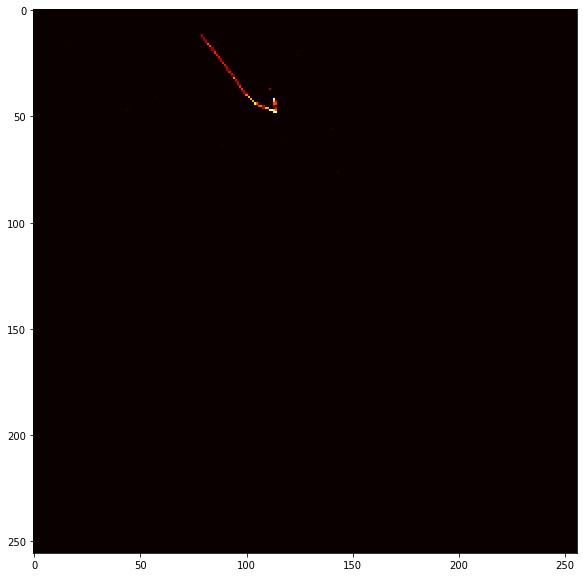

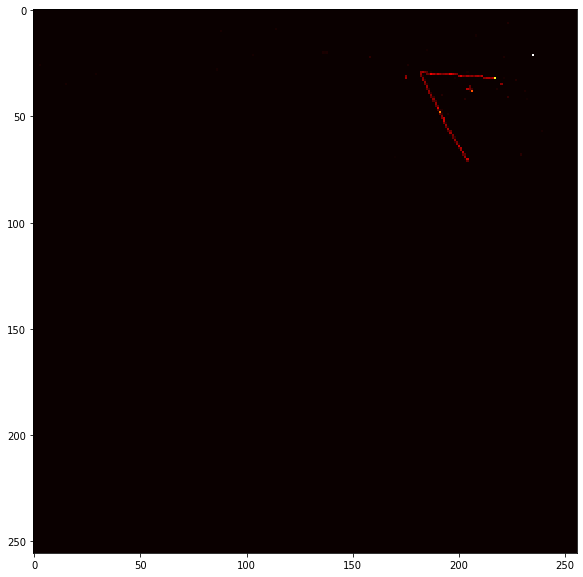

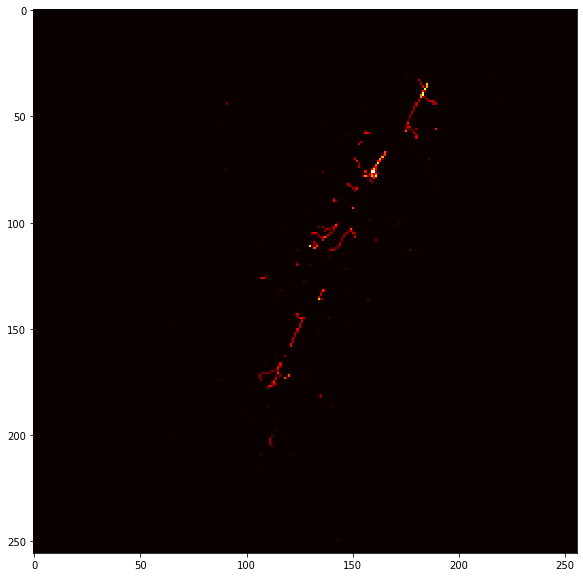

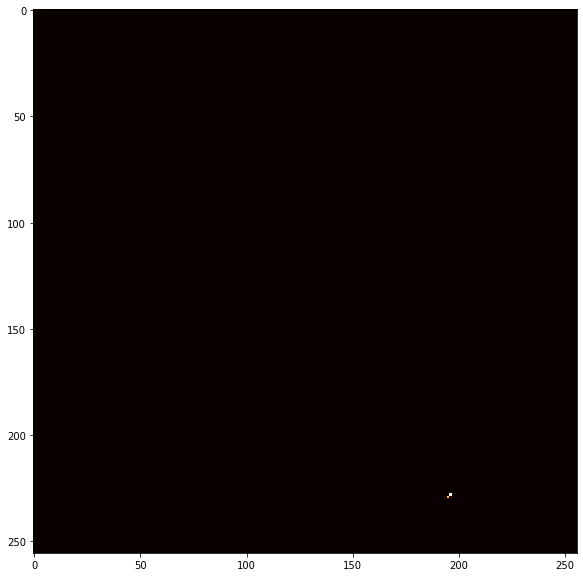

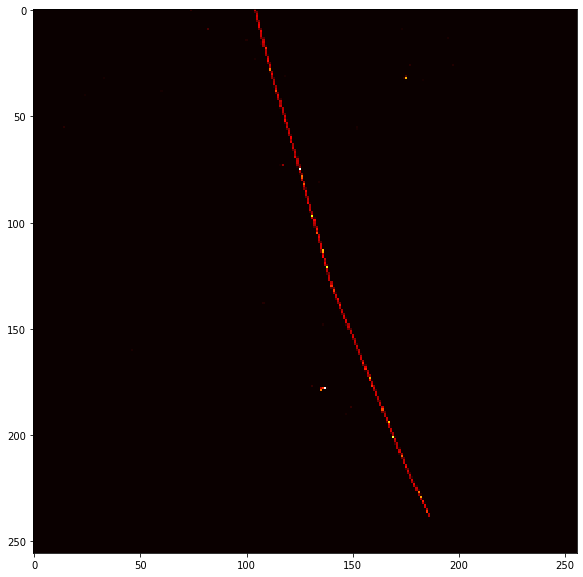

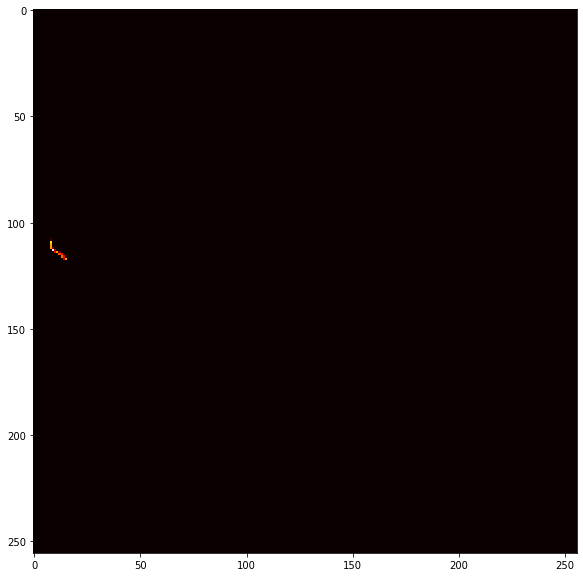

In [11]:
data = iotrain[0]
imgbatch = data["image"]
lbl = data["label"]
print(imgbatch.shape)
for ib in range(batchsize):
    fig, ax = plt.subplots(1,1,figsize=(10, 10))
    img = imgbatch[ib,:].reshape(256,256)
    imgout = padandcropandflip(img)
    print("LABEL[%d]: "%(ib),labelname[np.argmax(lbl[ib])])
    ax.imshow(imgout, cmap='hot', interpolation='nearest')
    fig.show()
